<a href="https://colab.research.google.com/github/Nmn99/Advance-Regression/blob/main/rossman_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This is the data which contains store details
store_details = pd.read_csv("/content/drive/MyDrive/data.zip (Unzipped Files)/store.csv")
store_details

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# Our Train data
train_data = pd.read_csv("/content/drive/MyDrive/data.zip (Unzipped Files)/train.csv")
train_data

<ipython-input-4-31f24c0222df>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("/content/drive/MyDrive/data.zip (Unzipped Files)/train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
# merged our train data and store details data based on store number to get complete info for each store
combined_data = pd.merge(train_data, store_details, on='Store')
combined_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
combined_data.shape

(1017209, 18)

In [ ]:
# prompt: identify missing values

combined_data.isnull().sum()


,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [ ]:
# prompt: identify unique values in each column remove date and competitiondistance

# Identify unique values in each column, excluding 'Date' and 'CompetitionDistance'
for col in combined_data.columns:
  if col not in ['Date', 'CompetitionDistance']:
    unique_vals = combined_data[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_vals)
    print("-" * 5)

Unique values in column 'Store':
[   1    2    3 ... 1113 1114 1115]
-----
Unique values in column 'DayOfWeek':
[5 4 3 2 1 7 6]
-----
Unique values in column 'Sales':
[ 5263  6064  8314 ...   660 17815 23303]
-----
Unique values in column 'Customers':
[ 555  625  821 ... 3900   36 4065]
-----
Unique values in column 'Open':
[1 0]
-----
Unique values in column 'Promo':
[1 0]
-----
Unique values in column 'StateHoliday':
['0' 'a' 'b' 'c' 0]
-----
Unique values in column 'SchoolHoliday':
[1 0]
-----
Unique values in column 'StoreType':
['c' 'a' 'd' 'b']
-----
Unique values in column 'Assortment':
['a' 'c' 'b']
-----
Unique values in column 'CompetitionOpenSinceMonth':
[ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
-----
Unique values in column 'CompetitionOpenSinceYear':
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
-----
Unique values in column 'Promo2':
[0 1]
-----
Unique values i

In [ ]:
# prompt: extract year and months from date column using lambda

combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data['Year'] = combined_data['Date'].apply(lambda date: date.year)
combined_data['Month'] = combined_data['Date'].apply(lambda date: date.month)



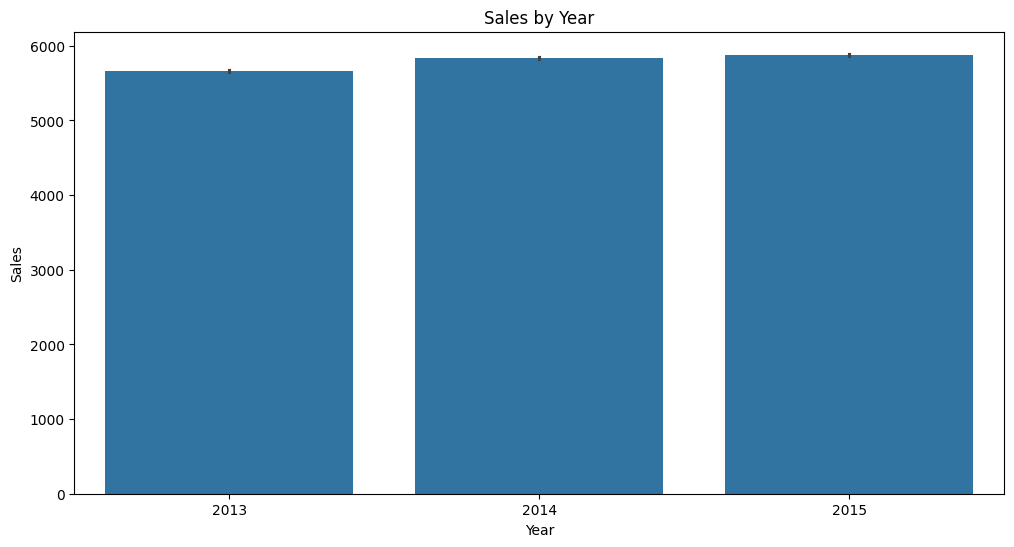

In [ ]:
# prompt: create sns.barplot for sales by year

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Sales', data=combined_data)
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

<ipython-input-11-f8c9b59a6481>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='Sales', data=combined_data, palette='viridis')


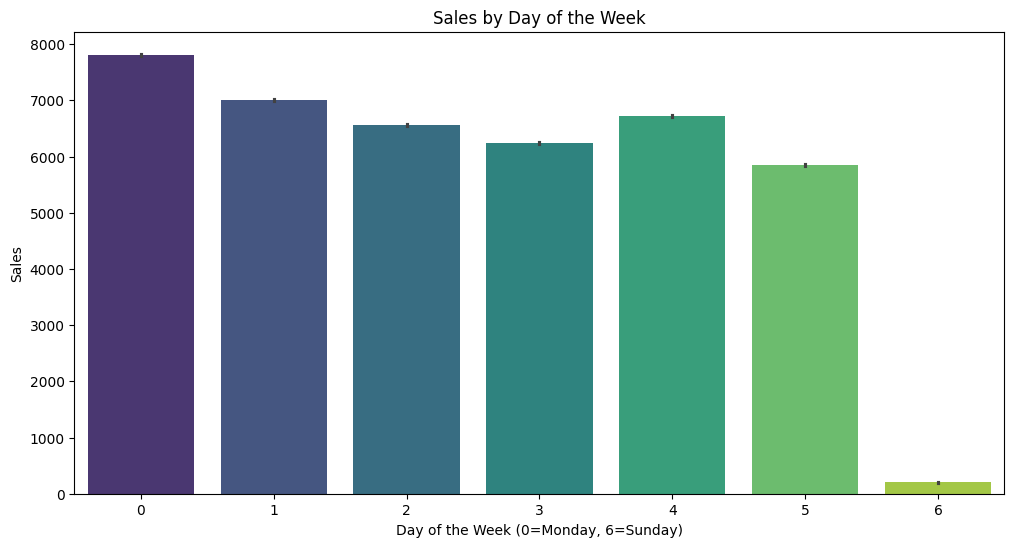

In [ ]:
# prompt: plot sales with respect to day of the week in different colurs

# Convert 'Date' column to datetime objects
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

# Extract the day of the week (0=Monday, 6=Sunday)
combined_data['DayOfWeek'] = combined_data['Date'].dt.dayofweek

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='Sales', data=combined_data, palette='viridis')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Sales')
plt.show()

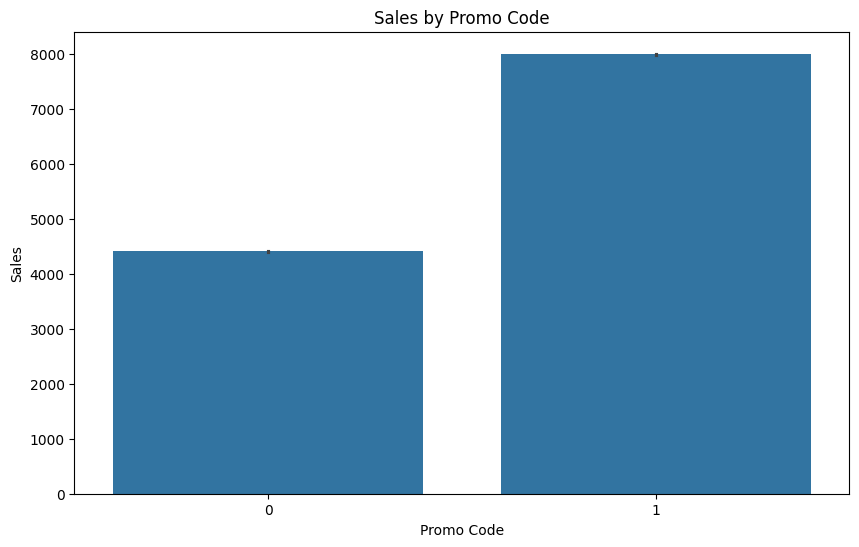

In [ ]:
# prompt: plot sales wiht respect to promo code

# Plotting sales with respect to promo code
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=combined_data)
plt.title('Sales by Promo Code')
plt.xlabel('Promo Code')
plt.ylabel('Sales')
plt.show()

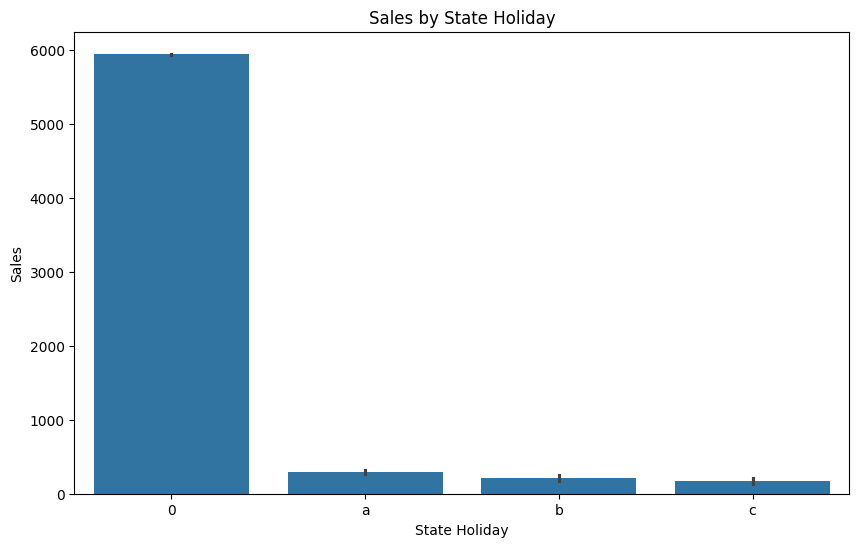

In [ ]:
# prompt: plot sales with respect to state holiday

# Plotting sales with respect to state holiday
plt.figure(figsize=(10, 6))
sns.barplot(x='StateHoliday', y='Sales', data=combined_data)
plt.title('Sales by State Holiday')
plt.xlabel('State Holiday')
plt.ylabel('Sales')
plt.show()

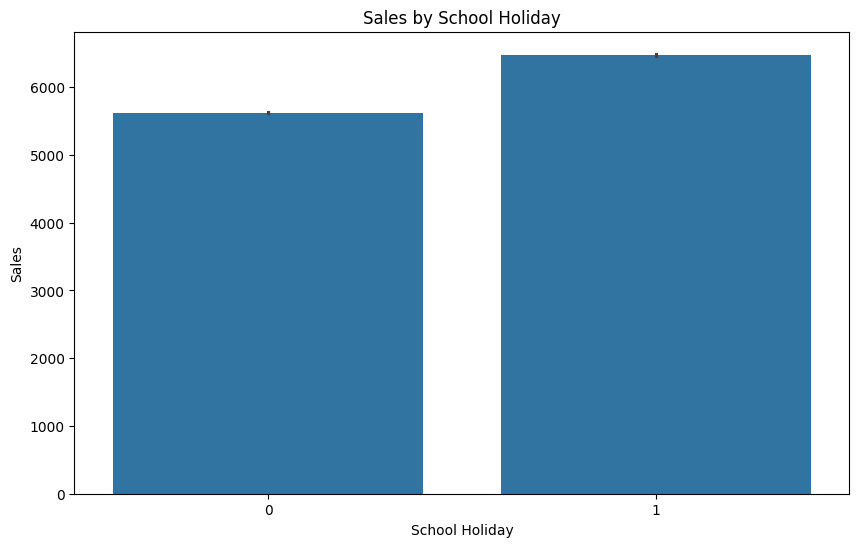

In [ ]:
# prompt: plot sales and school holiday

# Plotting sales with respect to school holiday
plt.figure(figsize=(10, 6))
sns.barplot(x='SchoolHoliday', y='Sales', data=combined_data)
plt.title('Sales by School Holiday')
plt.xlabel('School Holiday')
plt.ylabel('Sales')
plt.show()

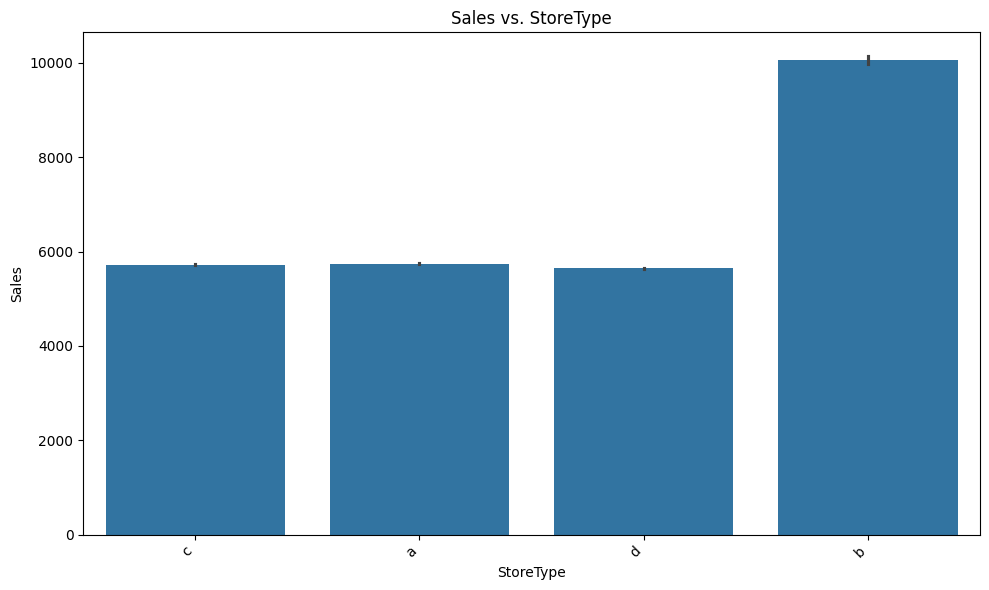

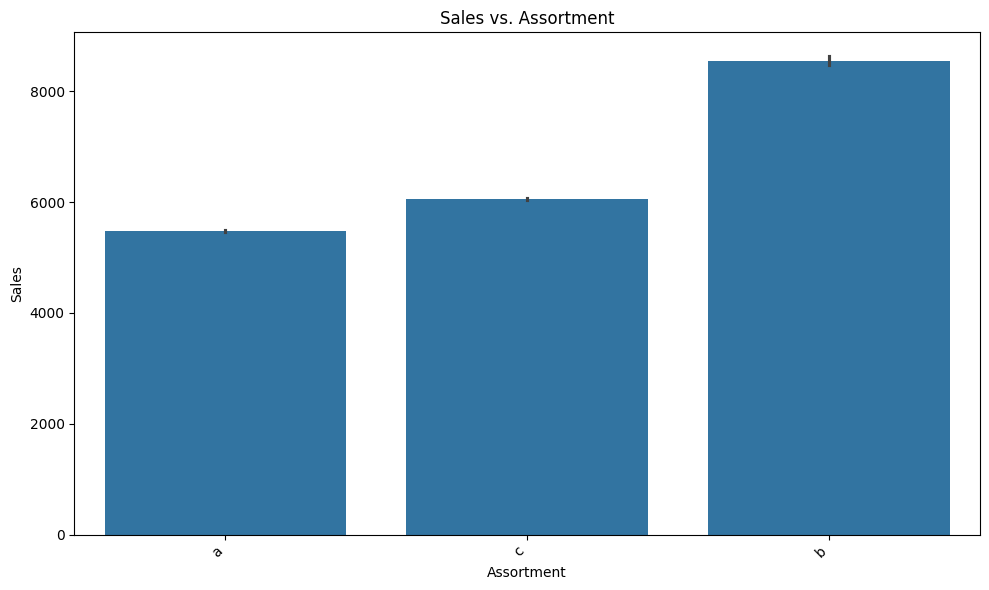

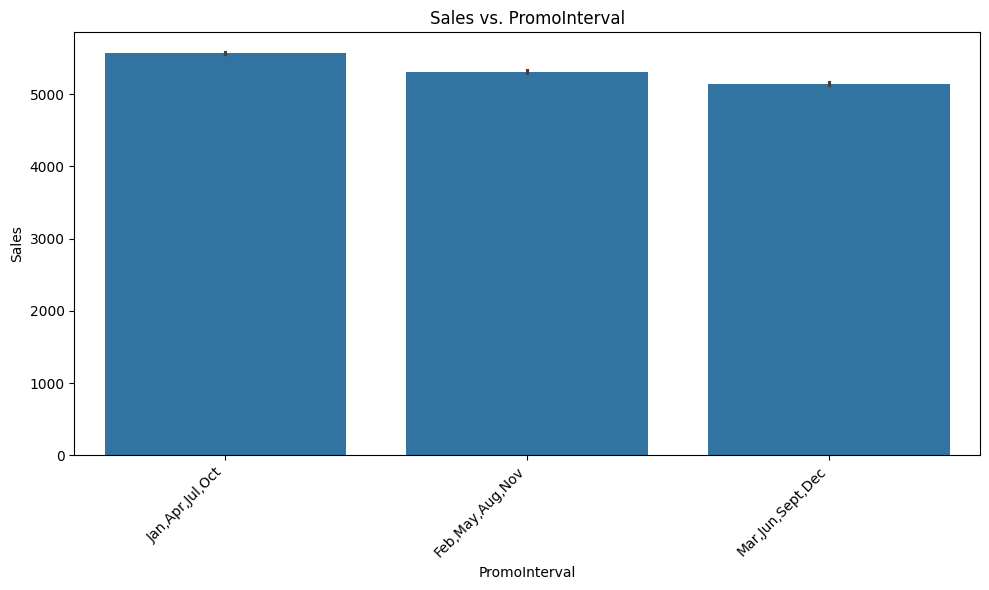

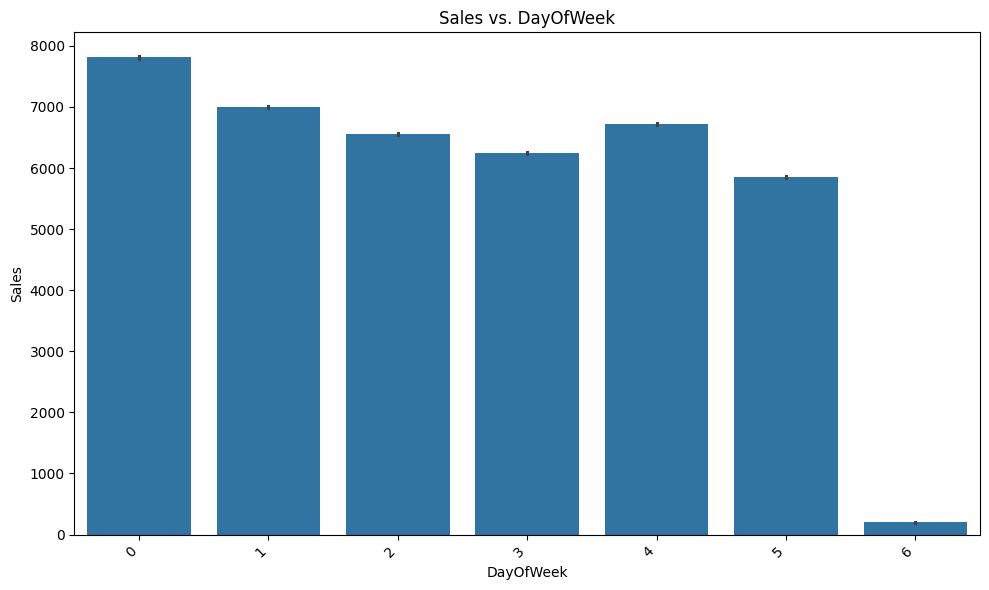

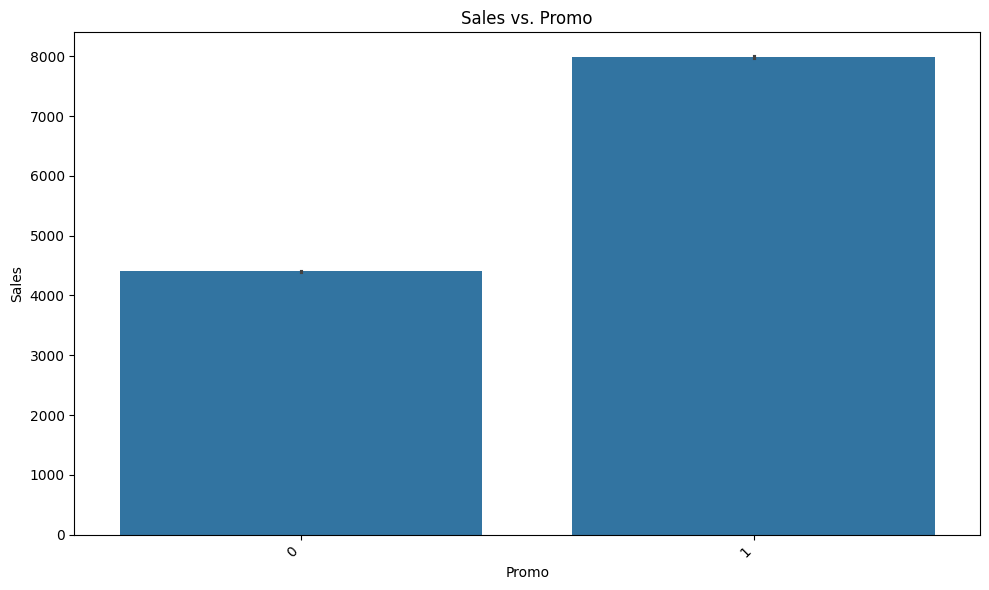

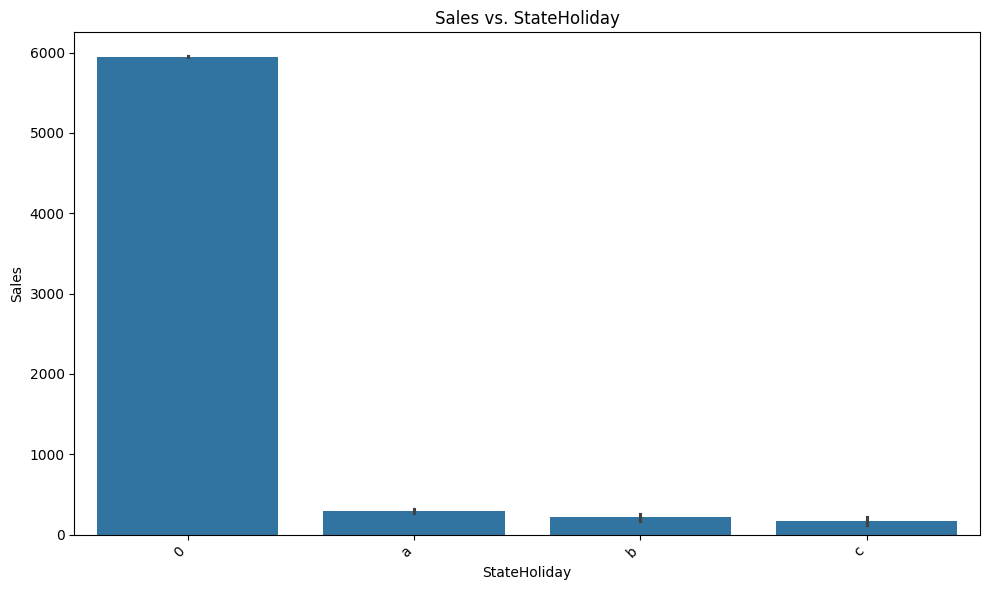

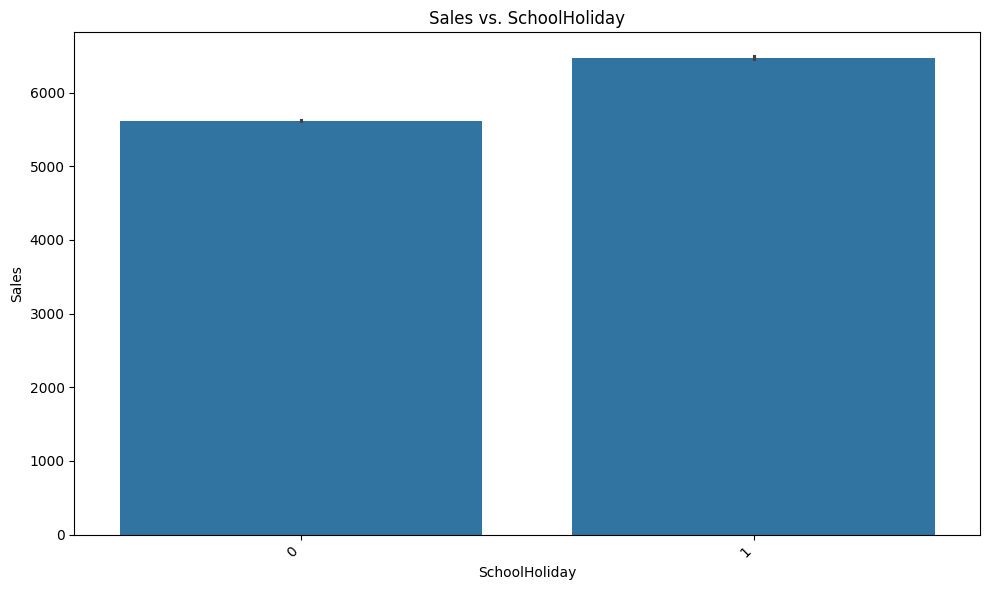

In [ ]:
'''# prompt: make function to plot sales y and for each column x and plot them

def plot_sales_vs_columns(df, column_names):
  """Plots sales against specified columns in a DataFrame.

  Args:
    df: The input DataFrame containing 'Sales' and the specified columns.
    column_names: A list of column names to plot against 'Sales'.
  """
  for col in column_names:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.barplot(x=col, y='Sales', data=df)
    plt.title(f'Sales vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

# Example usage (assuming 'combined_data' DataFrame is available)
columns_to_plot = ['StoreType', 'Assortment', 'PromoInterval', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday']
plot_sales_vs_columns(combined_data, columns_to_plot)

In [ ]:
# prompt: identify all null values for train_details

# Assuming 'train_data' DataFrame is already loaded as in the provided code.

# Identify null values in the 'train_data' DataFrame.
null_values = train_data.isnull().sum()

# Print the null values for each column.
null_values

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
store_details.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [ ]:
# prompt: replace store_details CompetitionOpenSinceMonth, CompetitionOpenSinceYear
# na with mean

# Fill NaN values in 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' with the mean
store_details['CompetitionOpenSinceMonth'].fillna(store_details['CompetitionOpenSinceMonth'].mean(), inplace=True)
store_details['CompetitionOpenSinceYear'].fillna(store_details['CompetitionOpenSinceYear'].mean(), inplace=True)

<ipython-input-18-47107ebbf090>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_details['CompetitionOpenSinceMonth'].fillna(store_details['CompetitionOpenSinceMonth'].mean(), inplace=True)
<ipython-input-18-47107ebbf090>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [ ]:
# prompt: Promo2SinceWeek, Promo2SinceYear, PromoInterval replace missing values with mode in store_details

# Fill NaN values in 'Promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' with the mode
for column in ['Promo2SinceWeek', 'Promo2SinceYear']:
    store_details[column].fillna(store_details[column].mode()[0], inplace=True)

store_details['PromoInterval'].fillna(store_details['PromoInterval'].mode()[0], inplace=True)

<ipython-input-19-42dbbf7b179c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_details[column].fillna(store_details[column].mode()[0], inplace=True)
<ipython-input-19-42dbbf7b179c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [ ]:
store_details.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


In [ ]:
# prompt: store_details fill CompetitionDistance with mean

# Fill NaN values in 'CompetitionDistance' with the mean
store_details['CompetitionDistance'].fillna(store_details['CompetitionDistance'].mean(), inplace=True)

<ipython-input-21-2147657bc418>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_details['CompetitionDistance'].fillna(store_details['CompetitionDistance'].mean(), inplace=True)


In [ ]:
store_details.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


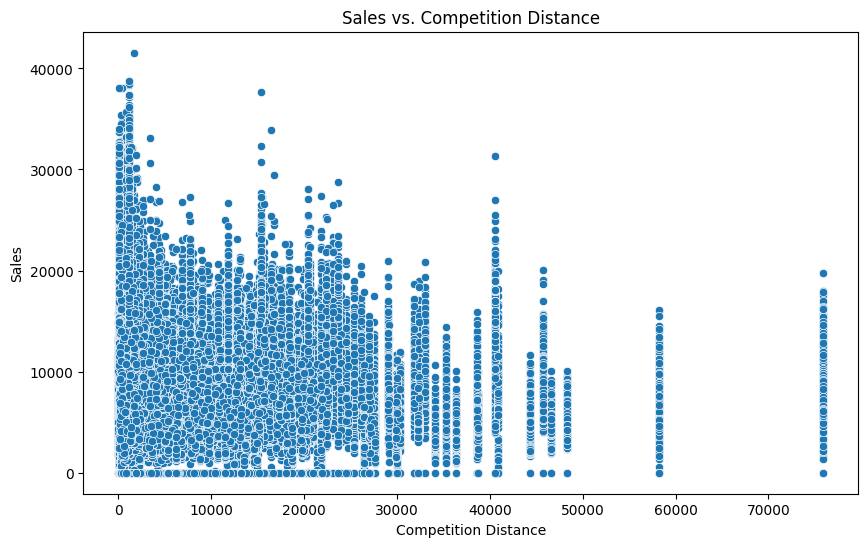

In [ ]:
# prompt: plot scatter plot for sales and competetion distanc

plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=combined_data)
plt.title('Sales vs. Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

<Figure size 1000x600 with 0 Axes>

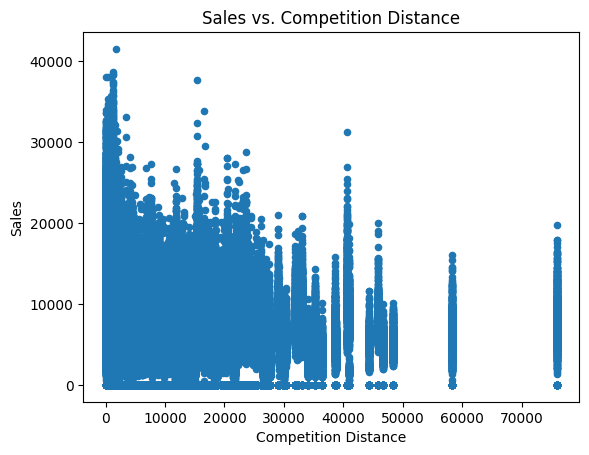

In [ ]:
# prompt: data.plot kind scatter for sales and competetion distance

# Assuming 'combined_data' DataFrame is already loaded and processed as in your provided code.

plt.figure(figsize=(10, 6))
combined_data.plot(kind='scatter', x='CompetitionDistance', y='Sales')
plt.title('Sales vs. Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

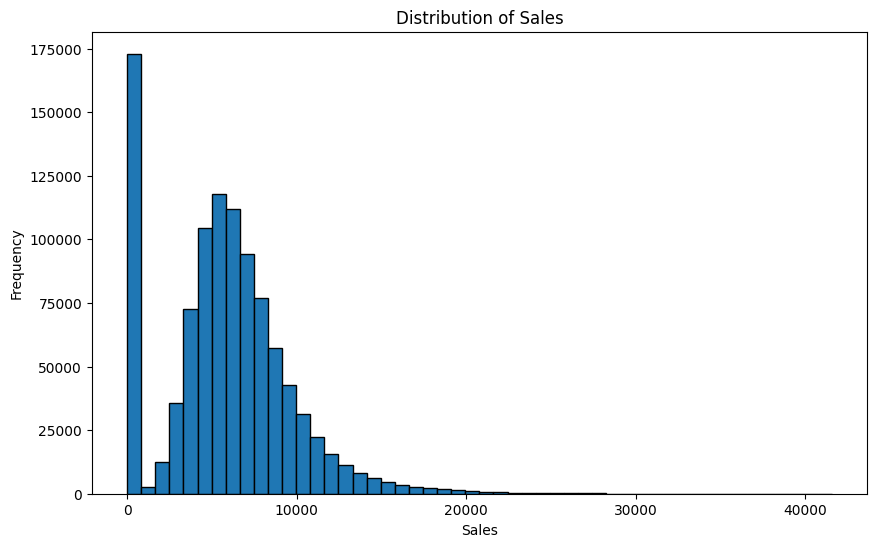

In [ ]:
# prompt: plot distribution of sales  using histogram

plt.figure(figsize=(10, 6))
plt.hist(combined_data['Sales'], bins=50, edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

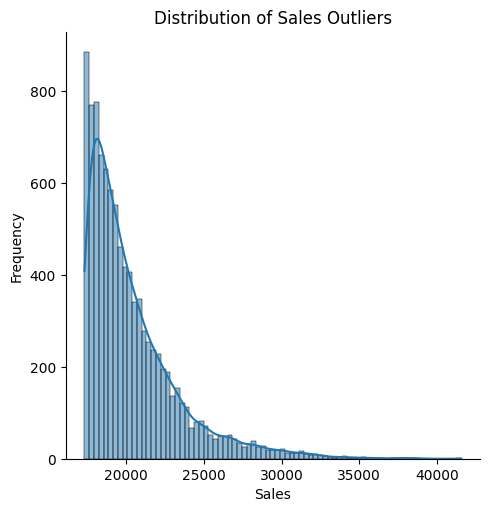

In [ ]:
# prompt: calculate the mean and standard deviation of a 'Sales' column in a pandas DataFrame, identify outliers using a Z-score threshold of 3, and visualize the distribution of these outliers using a Seaborn displot.

# Calculate the mean and standard deviation of 'Sales'
sales_mean = combined_data['Sales'].mean()
sales_std = combined_data['Sales'].std()

# Calculate Z-scores
combined_data['Zscore'] = (combined_data['Sales'] - sales_mean) / sales_std

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers = combined_data[(combined_data['Zscore'] > 3) | (combined_data['Zscore'] < -3)]

# Visualize the distribution of outliers
plt.figure(figsize=(10, 6))
sns.displot(outliers['Sales'], kde=True)  # Use displot for better visualization
plt.title('Distribution of Sales Outliers')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# prompt: no_holiday_zero_sales.loc = when sales==0 and open==1 , stte_holiday==0 and schoolholiday==0

# Assuming 'combined_data' DataFrame is already loaded and processed.

# Create a boolean mask for the specified conditions
mask = (combined_data['Sales'] == 0) & (combined_data['Open'] == 1) & (combined_data['StateHoliday'] == 0) & (combined_data['SchoolHoliday'] == 0)

# Use the mask to locate rows meeting the criteria
no_holiday_zero_sales = combined_data.loc[mask]

# Now 'no_holiday_zero_sales' contains the rows where sales are zero, the store is open,
# there's no state holiday, and no school holiday.

# Display the DataFrame
no_holiday_zero_sales

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Zscore
330176,357,0,2014-09-22,0,0,1,0,0,0,a,...,2060.0,10.0,2008.0,0,NaN,NaN,NaN,2014,9,-1.499722
340348,227,3,2014-09-11,0,0,1,0,0,0,a,...,2370.0,NaN,NaN,0,NaN,NaN,NaN,2014,9,-1.499722
340860,835,3,2014-09-11,0,0,1,0,0,0,a,...,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec",2014,9,-1.499722
341795,835,2,2014-09-10,0,0,1,0,0,0,a,...,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec",2014,9,-1.499722
346734,28,3,2014-09-04,0,0,1,1,0,0,a,...,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec",2014,9,-1.499722
387656,887,2,2014-07-23,0,0,1,0,0,0,d,...,19700.0,NaN,NaN,1,37.0,2009.0,"Jan,Apr,Jul,Oct",2014,7,-1.499722
525365,986,1,2014-03-18,0,0,1,1,0,0,a,...,620.0,10.0,2014.0,1,18.0,2014.0,"Feb,May,Aug,Nov",2014,3,-1.499722
531396,327,2,2014-03-12,0,0,1,0,0,0,c,...,1390.0,12.0,2004.0,0,NaN,NaN,NaN,2014,3,-1.499722
561199,25,3,2014-02-13,0,0,1,0,0,0,c,...,430.0,4.0,2003.0,0,NaN,NaN,NaN,2014,2,-1.499722
562314,25,2,2014-02-12,0,0,1,0,0,0,c,...,430.0,4.0,2003.0,0,NaN,NaN,NaN,2014,2,-1.499722


In [ ]:
# prompt: drop mask from combined_data

# Assuming 'combined_data' DataFrame and the 'mask' are already defined as in your provided code.

# Drop rows where the mask is True
combined_data = combined_data[~mask]

# Now 'combined_data' no longer contains the rows that met the criteria defined in the mask.

# Verify the change (optional)
combined_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Zscore
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,-0.132683
1,2,4,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,0.075373
2,3,4,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,0.659800
3,4,4,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,2.135413
4,5,4,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,-0.247230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,1,2013-01-01,0,0,0,0,a,1,a,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,-1.499722
1017205,1112,1,2013-01-01,0,0,0,0,a,1,c,...,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,-1.499722
1017206,1113,1,2013-01-01,0,0,0,0,a,1,a,...,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,-1.499722
1017207,1114,1,2013-01-01,0,0,0,0,a,1,a,...,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,-1.499722


In [ ]:
# prompt:  drop date column

# Drop the 'Date' column
combined_data = combined_data.drop('Date', axis=1)

In [ ]:
combined_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Zscore
0,1,4,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,-0.132683
1,2,4,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,0.075373
2,3,4,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,0.659800
3,4,4,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,2.135413
4,5,4,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,-0.247230


In [ ]:
# prompt: combined_data = concat

# Assuming 'train_data' and 'store_details' DataFrames are already loaded.

# Concatenate the two dataframes.  Note the axis=0 argument to stack vertically.
combined_data = pd.concat([train_data, store_details], axis=1)

# Display the first few rows of the combined dataframe.
combined_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,1.0,c,a,1270.0,9.0,2008.0,0.0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064,625,1,1,0,1,2.0,a,a,570.0,11.0,2007.0,1.0,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,3.0,a,a,14130.0,12.0,2006.0,1.0,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,4.0,c,c,620.0,9.0,2009.0,0.0,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822,559,1,1,0,1,5.0,a,a,29910.0,4.0,2015.0,0.0,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [ ]:
# prompt: combined_ is null

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
# importing necessary libraries

drive.mount('/content/drive')
# This is the data which contains store details
store_details = pd.read_csv("/content/drive/MyDrive/data.zip (Unzipped Files)/store.csv")
# Our Train data
train_data = pd.read_csv("/content/drive/MyDrive/data.zip (Unzipped Files)/train.csv")

# merged our train data and store details data based on store number to get complete info for each store
combined_data = pd.merge(train_data, store_details, on='Store', how='left') # Use a left merge to avoid losing data

# Check for null values after the merge
print(combined_data.isnull().sum())


# Fill NaN values in 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' with the mean
combined_data['CompetitionOpenSinceMonth'].fillna(combined_data['CompetitionOpenSinceMonth'].mean(), inplace=True)
combined_data['CompetitionOpenSinceYear'].fillna(combined_data['CompetitionOpenSinceYear'].mean(), inplace=True)

# Fill NaN values in 'Promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' with the mode
for column in ['Promo2SinceWeek', 'Promo2SinceYear']:
    combined_data[column].fillna(combined_data[column].mode()[0], inplace=True)

combined_data['PromoInterval'].fillna(combined_data['PromoInterval'].mode()[0], inplace=True)

# Fill NaN values in 'CompetitionDistance' with the mean
combined_data['CompetitionDistance'].fillna(combined_data['CompetitionDistance'].mean(), inplace=True)

print(combined_data.isnull().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-32-03d6e019a478>:14: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("/content/drive/MyDrive/data.zip (Unzipped Files)/train.csv")


Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


<ipython-input-32-03d6e019a478>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['CompetitionOpenSinceMonth'].fillna(combined_data['CompetitionOpenSinceMonth'].mean(), inplace=True)
<ipython-input-32-03d6e019a478>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [ ]:
combined_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [ ]:
# prompt: unique values in state holiday

print(combined_data['StateHoliday'].unique())


['0' 'a' 'b' 'c' 0]


In [ ]:
# prompt: data tyes in combined_data

combined_data.dtypes

,0
Store,int64
DayOfWeek,int64
Date,object
Sales,int64
Customers,int64
Open,int64
Promo,int64
StateHoliday,object
SchoolHoliday,int64
StoreType,object


In [ ]:
# prompt: drop date

# Drop the 'Date' column
combined_data = combined_data.drop('Date', axis=1)
combined_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [ ]:
# prompt: Encode categorical variables 'StoreType' and 'Assortment' using LabelEncoder from sklearn.preprocessing.
# Map categorical values in 'PromoInterval' to numerical values (e.g., 1, 2, 3) based on specific patterns.
# Map categorical values in 'StateHoliday' to numerical values (e.g., 1, 2, 3) based on specific categories.
# Display the first few rows of the preprocessed DataFrame.

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'StoreType'
combined_data['StoreType'] = le.fit_transform(combined_data['StoreType'])

# Encode 'Assortment'
combined_data['Assortment'] = le.fit_transform(combined_data['Assortment'])

# Map 'PromoInterval'
promo_interval_mapping = {'Jan,Apr,Jul,Oct': 1, 'Feb,May,Aug,Nov': 2, 'Mar,Jun,Sept,Dec': 3}
combined_data['PromoInterval'] = combined_data['PromoInterval'].map(promo_interval_mapping).fillna(0).astype(int)

# Map 'StateHoliday'
state_holiday_mapping = {'0': 0, 'a': 1, 'b': 2, 'c': 3}
# Fill NaN values before converting to integers
combined_data['StateHoliday'] = combined_data['StateHoliday'].map(state_holiday_mapping).fillna(0).astype(int)
#If a value in 'StateHoliday' is not found in state_holiday_mapping it will be replaced with 0.
#This ensures all values can be cast as integers.

# Display first few rows
combined_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,14.0,2011.0,1
1,2,5,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,1
2,3,5,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,1
3,4,5,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0,14.0,2011.0,1
4,5,5,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,14.0,2011.0,1


In [ ]:
# prompt: print dtype

combined_data.dtypes

,0
Store,int64
DayOfWeek,int64
Sales,int64
Customers,int64
Open,int64
Promo,int64
StateHoliday,int64
SchoolHoliday,int64
StoreType,int64
Assortment,int64


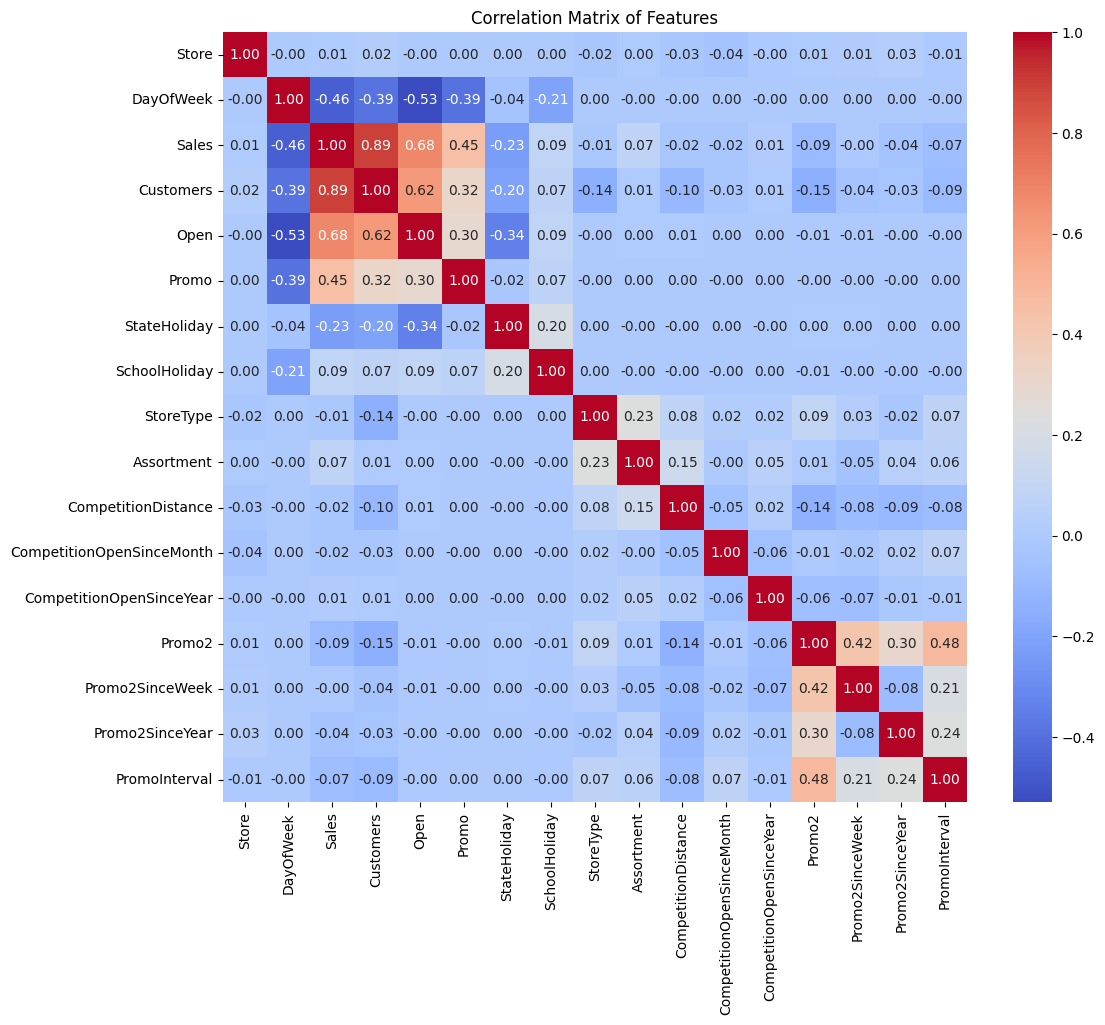

In [ ]:
# prompt: plot sns.heatmap

# Assuming 'combined_data' DataFrame is already loaded and processed as in your provided code.
# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math

In [ ]:
# prompt: divide subets based on open ==0 or == 1

# Assuming 'combined_data' DataFrame is already loaded and processed.

# Create subsets based on the 'Open' column
open_0_subset = combined_data[combined_data['Open'] == 0]
subset = combined_data[combined_data['Open'] == 1]



In [ ]:
# prompt: split subset to x and y train test and drop Open, Sales and Custmers

# Define features (X) and target (y)
X = subset.drop(['Open', 'Sales', 'Customers'], axis=1)
y = subset['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.columns

Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# prompt: initialise epsilon value

epsilon = 1e-10

# **Linear Regression**

In [ ]:
from sklearn import linear_model

reg_model = linear_model.LinearRegression() # making regression model
reg_model.fit(X_train, y_train)

prediction_open = reg_model.predict(X_test)

prediction_closed = np.zeros(open_0_subset.shape[0])

prediction = np.append(prediction_open, prediction_closed)

y_test = np.append(y_test, np.zeros(open_0_subset.shape[0]))

print("r2_score: ",r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,prediction))
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test,prediction)))

r2_score:  0.7694748315162638
Mean absolute error: 1007.44
Root mean squared error:  1971.234238760661


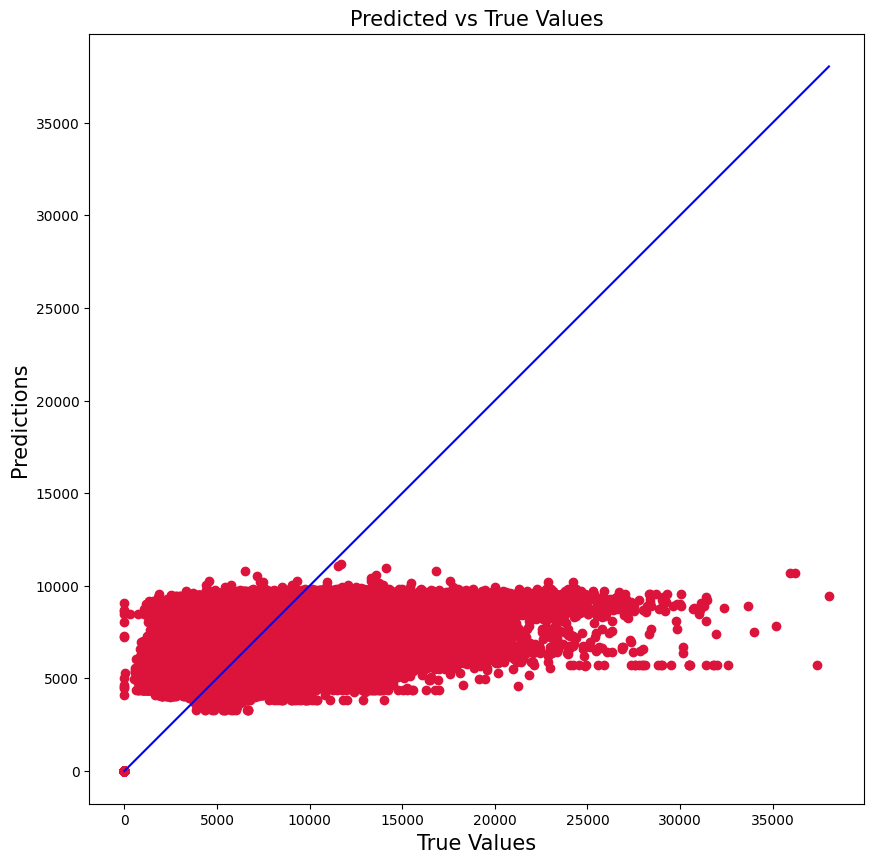

In [ ]:
# prompt: Create a scatter plot: Use plt.scatter(y_test, prediction, c='crimson') to create a scatter plot with:
# x-axis: True values (y_test).
# y-axis: Predictions (prediction).
# Color: Crimson (c='crimson').
# Plot the perfect fit line:
# Find the maximum and minimum values of both y_test and prediction using max and min.
# Use plt.plot([p1, p2], [p1, p2], 'b-') to plot a blue dashed line ('b-') from the minimum (p2) to the maximum (p1) value on both axes, representing a perfect fit scenario.
# Label axes: Add labels for the x-axis ('True Values') and the y-axis ('Predictions') using plt.xlabel and plt.ylabel.
# Set equal aspect ratio: Use plt.axis('equal') to ensure the axes have the same scaling for a proper comparison.
# Display the plot: Use plt.show() to display the generated scatter plot.
# add key

p1 = max(max(y_test), max(prediction))
p2 = min(min(y_test), min(prediction))

plt.figure(figsize=(10, 10))
plt.scatter(y_test, prediction, c='crimson')
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Predicted vs True Values', fontsize=15)
plt.show()

# **SGD Regressor**


SGD Regressor Metrics:
r2_score:  -3.0913914354471565e+23
Mean absolute error: 931449656241920.12
Root mean squared error:  2282737953237629.0


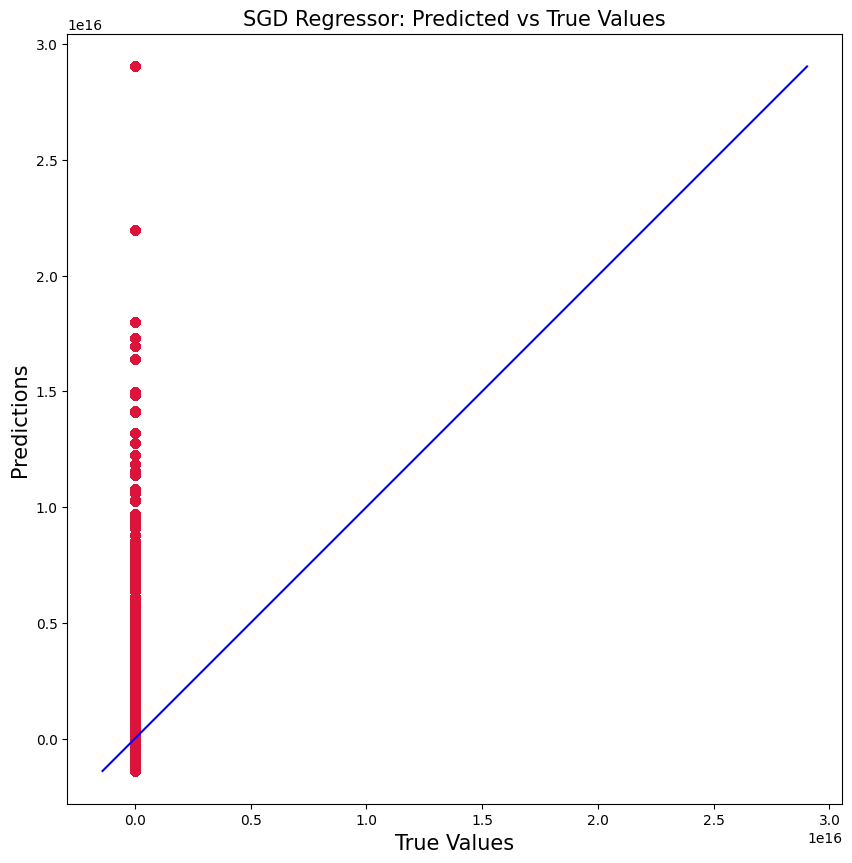

In [ ]:
from sklearn.linear_model import SGDRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
import matplotlib.pyplot as plt

# ... (Your existing code to prepare data and train the model) ...

# **SGD Regressor**
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42) # Initialize SGDRegressor
sgd_regressor.fit(X_train, y_train) # Train the model

sgd_predictions_open = sgd_regressor.predict(X_test) # Make predictions on the test set
sgd_predictions_closed = np.zeros(open_0_subset.shape[0]) # Predictions for closed stores are zero

sgd_predictions = np.append(sgd_predictions_open, sgd_predictions_closed) # Combine predictions

# Create y_test_combined with the original y_test (for open stores) and zeros for closed stores
y_test_combined = np.append(y_test[:X_test.shape[0]], np.zeros(open_0_subset.shape[0])) # Assuming original y_test had the correct size initially


print("\nSGD Regressor Metrics:") # Print metrics for SGDRegressor
print("r2_score: ",r2_score(y_test_combined, sgd_predictions))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test_combined, sgd_predictions))
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test_combined, sgd_predictions)))


p1_sgd = max(max(y_test_combined), max(sgd_predictions))
p2_sgd = min(min(y_test_combined), min(sgd_predictions))

plt.figure(figsize=(10, 10))
plt.scatter(y_test_combined, sgd_predictions, c='crimson')
plt.plot([p1_sgd, p2_sgd], [p1_sgd, p2_sgd], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('SGD Regressor: Predicted vs True Values', fontsize=15)
plt.show()

# **Random Forest Regressor**


Random Forest Regressor Metrics:
r2_score:  0.9551458047431322
Mean absolute error: 404.11
Root mean squared error:  869.5220396503408


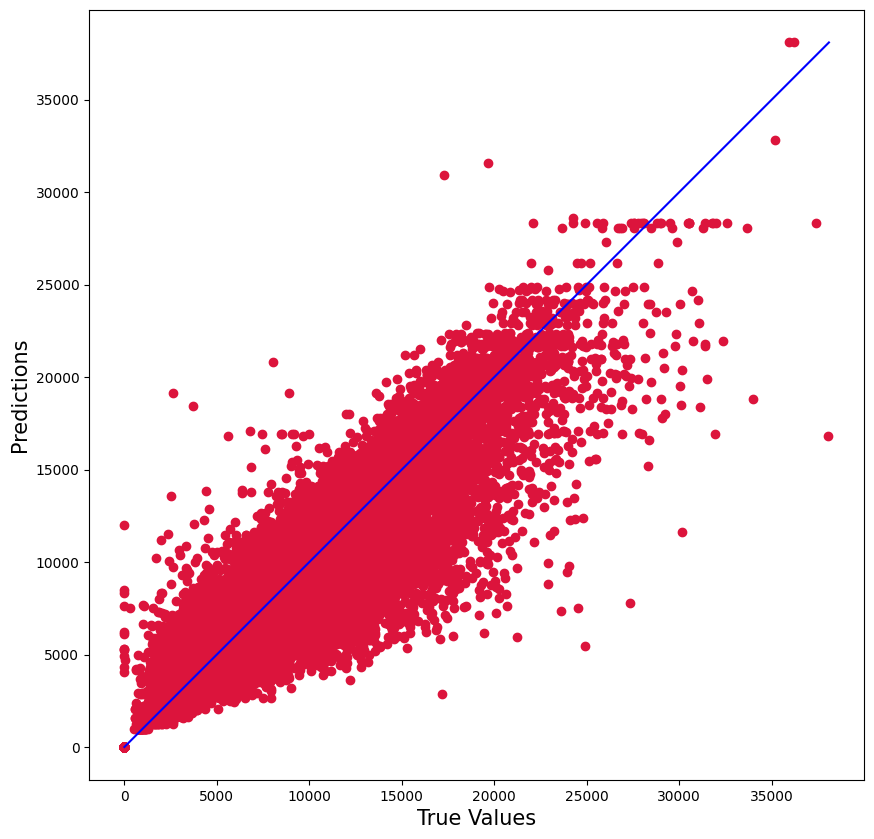

In [ ]:
# ... (Your existing code to prepare data and train the model) ...

# Make predictions on the test set for open stores
rf_predictions_open = rf_model.predict(X_test)

# Predictions for closed stores are zero
rf_predictions_closed = np.zeros(open_0_subset.shape[0])

# Combine predictions for open and closed stores
rf_predictions = np.append(rf_predictions_open, rf_predictions_closed)

# Instead of appending to y_test, create y_test_combined with the
# original y_test for open stores and zeros for closed stores,
# ensuring it has the same length as rf_predictions
y_test_combined = np.append(y_test[:X_test.shape[0]], np.zeros(open_0_subset.shape[0]))
# Assuming y_test initially contained data for both open and closed stores


# Evaluate the model
print("\nRandom Forest Regressor Metrics:")
print("r2_score: ", r2_score(y_test_combined, rf_predictions))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test_combined, rf_predictions))
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test_combined, rf_predictions)))

# ... (rest of your code)
plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

r2_score:  0.955169721991405
Mean absolute error: 404.01
Root mean squared error:  869.290184553849


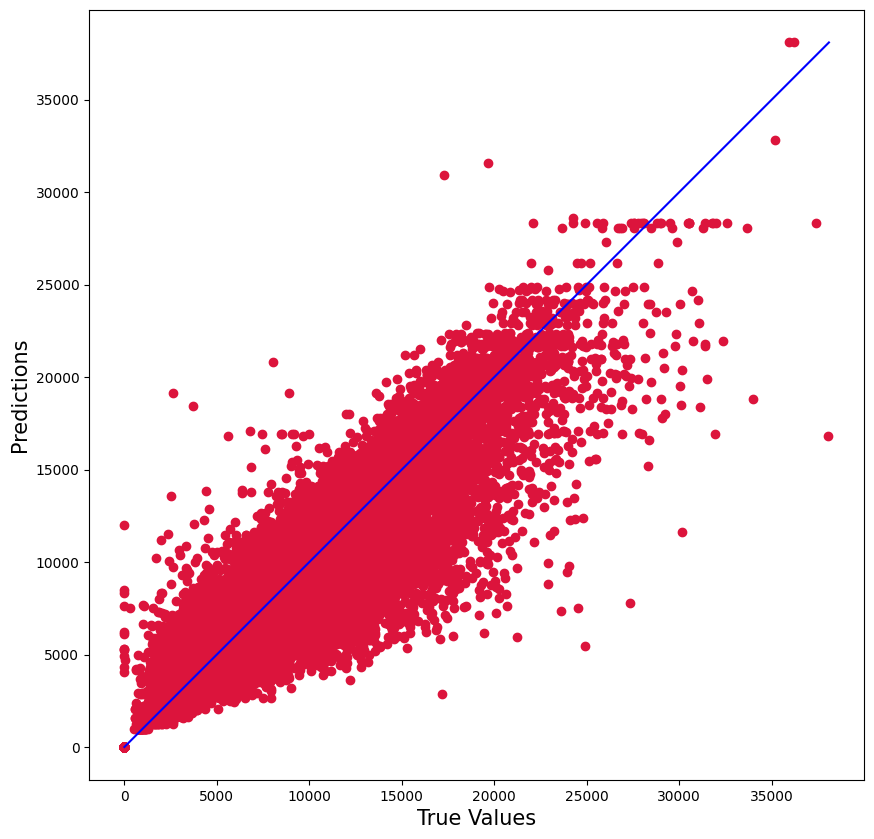

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor_model = RandomForestRegressor()
random_forest_regressor_model.fit(X_train,y_train)

prediction_open = random_forest_regressor_model.predict(X_test)
prediction_closed = np.zeros(open_0_subset.shape[0])

prediction = np.append(prediction_open, prediction_closed)



print("r2_score: ",r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,prediction))
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test,prediction)))


plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# **Decision Tree Regressor**


Decision Tree Regressor Metrics:
r2_score:  0.9551633027771818
Mean absolute error: 403.99
Root mean squared error:  869.3524188341639


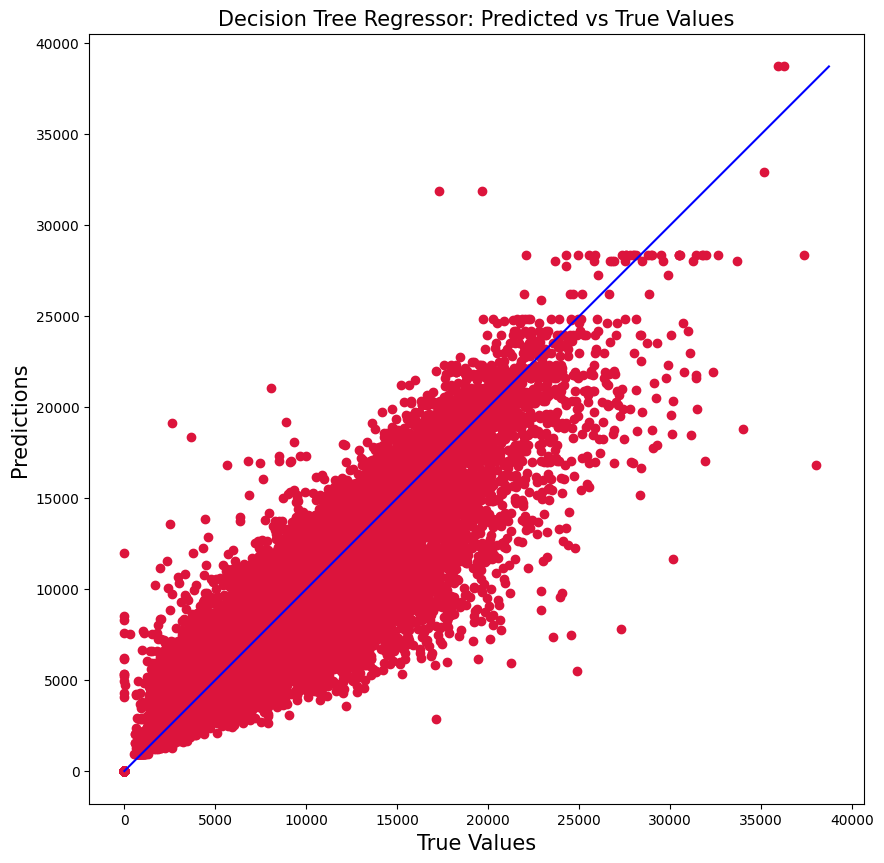

In [ ]:
# prompt: DecisionTreeRegressor train and fit

from sklearn.tree import DecisionTreeRegressor

# ... (Your existing code to prepare data and train the model) ...

# **Decision Tree Regressor**
dt_regressor = DecisionTreeRegressor(random_state=42)  # Initialize DecisionTreeRegressor
dt_regressor.fit(X_train, y_train)  # Train the model

dt_predictions_open = dt_regressor.predict(X_test)  # Make predictions on the test set
dt_predictions_closed = np.zeros(open_0_subset.shape[0])  # Predictions for closed stores are zero

dt_predictions = np.append(dt_predictions_open, dt_predictions_closed)  # Combine predictions

# Ensure y_test_combined has the correct size



print("\nDecision Tree Regressor Metrics:")  # Print metrics for DecisionTreeRegressor
print("r2_score: ", r2_score(y_test_combined, dt_predictions))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test_combined, dt_predictions))
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test_combined, dt_predictions)))

p1_dt = max(max(y_test_combined), max(dt_predictions))
p2_dt = min(min(y_test_combined), min(dt_predictions))

plt.figure(figsize=(10, 10))
plt.scatter(y_test_combined, dt_predictions, c='crimson')
plt.plot([p1_dt, p2_dt], [p1_dt, p2_dt], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Decision Tree Regressor: Predicted vs True Values', fontsize=15)
plt.show()